# **Setting up the environment**

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


## Importing data

In [3]:
data_set = pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")
data_set.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


## Separating features and target variable

In [4]:
X = data_set.iloc[:, 1:8].values
Y = data_set.iloc[:, 8].values

## Create train and test dataset

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.15,random_state=0)

## Training and fitting the model

In [19]:
from sklearn.linear_model import LinearRegression
SL_LR = LinearRegression(normalize=True)
print("Training using linear regression...\n")
SL_LR.fit(X_train,Y_train)
print("Complete!\n")

Training using linear regression...

Complete!



## Prediction on test data

In [7]:
y_pred = SL_LR.predict(X_test)

In [8]:
print(Y_test)

[0.64 0.85 0.8  0.91 0.68 0.54 0.54 0.65 0.52 0.79 0.65 0.74 0.64 0.79
 0.89 0.43 0.81 0.73 0.8  0.58 0.57 0.74 0.6  0.93 0.88 0.67 0.7  0.57
 0.48 0.64 0.69 0.47 0.57 0.87 0.39 0.53 0.84 0.89 0.63 0.7  0.72 0.86
 0.91 0.75 0.74 0.76 0.96 0.81 0.6  0.62 0.69 0.68 0.59 0.8  0.71 0.78
 0.69 0.89 0.67 0.58 0.44 0.89 0.53 0.92 0.66 0.73 0.52 0.86 0.54 0.72
 0.92 0.55 0.75 0.73 0.85]


## Calculating mean squared error

In [9]:
from sklearn.metrics import mean_squared_error
m2error = mean_squared_error(Y_test,y_pred)
print(m2error)

0.004492868645532096


# **Feature importance**

## Feature importance using regression coefficients

Feature: 0, Score: 0.00224
Feature: 1, Score: 0.00273
Feature: 2, Score: 0.00623
Feature: 3, Score: 0.00019
Feature: 4, Score: 0.01973
Feature: 5, Score: 0.11256
Feature: 6, Score: 0.02194


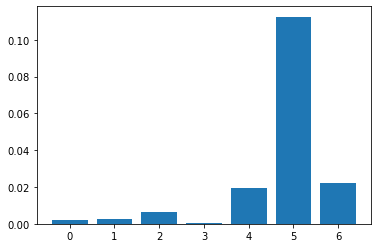

In [10]:
importance = SL_LR.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Feature importance using Decision Tree model

Feature: 0, Score: 0.08380
Feature: 1, Score: 0.02942
Feature: 2, Score: 0.00871
Feature: 3, Score: 0.03352
Feature: 4, Score: 0.02399
Feature: 5, Score: 0.80735
Feature: 6, Score: 0.01322


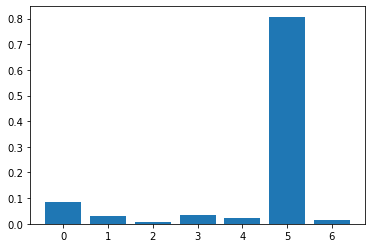

In [18]:
from sklearn.tree import DecisionTreeRegressorl
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train, Y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### As we can see the Feature 5 which is CGPA affects the most on the chance of admit.